In [ ]:
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PATH_1 ='./drive/MyDrive/Dane/Zadanie_1.csv'
PATH_2 ='./drive/MyDrive/Dane/Zadanie_2.csv'
PATH_4 ='./drive/MyDrive/Dane/Zadanie_4.csv'

# Zadanie 1 (4 punkty)
*   Ile komórek liczy sobie macierz
*   Ile ma wierszy a ile kolumn
*   Oblicz następujące statystyki opisowe dla macierzy: średnia/mediana/wariancja
*   Powtórz czynność z podpunktu b), ale tym razem usuń z macierzy braki danych.


In [ ]:
import pandas as pd

df = pd.read_csv(PATH_1, sep = ';')
dm = df.to_numpy()

print(f'Liczba komórek: {np.size(dm)}')
print(f'Liczba kolumn i wierszy: {np.shape(dm)}')
print(f'Średnia: {np.mean(dm)}')
print(f'Mediana: {np.median(dm)}')
print(f'Wariancja: {np.var(dm)}')
dn = df.dropna().to_numpy()
print('Wartości po usunięciu wartości NaN')
print(f'Liczba kolumn i wierszy: {np.shape(dn)}')
print(f'Średnia: {np.mean(dn).round(2)}')
print(f'Mediana: {np.median(dn)}')
print(f'Wariancja: {np.var(dn).round(2)}')

Liczba komórek: 960
Liczba kolumn i wierszy: (60, 16)
Średnia: nan
Mediana: nan
Wariacja: nan
Wartości po usunięciu wartości NaN
Liczba kolumn i wierszy: (43, 16)
Średnia: 332.2
Mediana: 34.0
Wariacja: 1042134.75


# Zadanie 2 (2 pkt)
Wgraj dane z pliku Zadanie_2.csv.
 >a)	Znajdź wektory własne, oraz wartości własne dla zawartej w pliku macierzy
---
 >b)	Oblicz macierz odwrotną dla macierzy z pliku


In [ ]:
dv = np.genfromtxt(PATH_2, delimiter=';')
print(f'Macierz z pliku:\n {dv}')
print(f'Wektory własne\n: {np.linalg.eig(dv)}')
print(f'Wartości własne\n: {np.linalg.eigvals(dv)}')
print(f'Macierz odwrotna\n: {np.linalg.inv(dv)}')

Macierz z pliku:
 [[  1.   2.  15. -59.   9.   3.  75.   6.   7.   1.]
 [  0.   5.   0.   4.   6.  16.  44.   7.   1.   1.]
 [  7.  14.   3. -10.   9.  15.  73.   8.   2.   9.]
 [  1.   5.  15. -54.   5.  15.  35.   8.   6.   4.]
 [  0.   8.   5. -18.   7.  16.  91.   6.   7.   9.]
 [  7.  18.  23. -90.   4.   8.  31.   0.   1.   7.]
 [  2.   8.  20. -72.   4.   1.  91.   9.   4.   4.]
 [  4.  12.  18. -65.   6.   9.  76.   4.   9.   9.]
 [  7.  15.  13. -52.   5.   7.  54.   2.   7.   0.]
 [  2.   9.  15. -56.   6.   1.  98.   4.   8.   4.]]
Wektory własne
: (array([104.34960192 +0.j        , -23.35660516+18.84992811j,
       -23.35660516-18.84992811j,  15.92989017 +0.j        ,
        -4.99456452 +0.j        ,   0.35205717 +5.80125175j,
         0.35205717 -5.80125175j,  -1.03383491 +0.j        ,
         3.87900166 +1.42651533j,   3.87900166 -1.42651533j]), array([[-0.29000475+0.j        , -0.07545445+0.07743149j,
        -0.07545445-0.07743149j, -0.03544485+0.j        ,
         0

#Zadanie 3 (4 punkty)
Wgraj dane z pliku Zadanie_3.csv
Wykorzystaj następujący wzór:

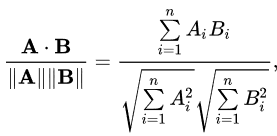

Gdzie A i B to wektory reprezentujące kolejne kolumny.

Aby stworzyć macierz podobieństwa w oparciu o macierz z pliku.


In [ ]:

MA ='./drive/MyDrive/Dane/Zadanie_3_macierz_A.csv'
MB ='./drive/MyDrive/Dane/Zadanie_3_macierz_B.csv'
m1 = np.genfromtxt(MA, delimiter=',')
m2 = np.genfromtxt(MB, delimiter=',')

def cos_sim_2d(x, y):
    norm_x = x / np.linalg.norm(x, axis=1, keepdims=True)
    norm_y = y / np.linalg.norm(y, axis=1, keepdims=True)
    return np.matmul(norm_x, norm_y.T)

print(cos_sim_2d(m1, m2))

[[0.7970534  0.93075784 0.85152689 0.80479273 0.86772183]
 [0.3985267  0.56879646 0.57428557 0.32694705 0.97618706]
 [0.92108283 0.9763075  0.91890016 0.9336035  0.69421013]]


https://towardsdatascience.com/cosine-similarity-matrix-using-broadcasting-in-python-2b1998ab3ff3

https://www.tutorialexample.com/compute-cosine-similarity-matrix-of-two-numpy-array-numpy-tutorial/

# Zadanie 4 (3 punkty)
W pliku Zadanie_4.csv zawarte są dane o stanie dostępności gabinetu lekarskiego w danej minucie.
Napisz program, który przekształci dane w taki sposób, żeby w jednej linijce zapisany był początek i koniec przedziału czasowego, kiedy lekarz jest dostępny
Dane zapisz do pliku CSV.


https://stackoverflow.com/questions/41399538/comparing-previous-row-values-in-pandas-dataframe

In [6]:
import pandas as pd
import datetime
from datetime import datetime


df_zf = pd.read_csv(PATH_4, sep = ';').dropna(axis = 1)
df_zf['Data'] = df_zf['DateTime'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y %H:%M').strftime("%d.%m.%Y"))
df_zf['Czas'] = df_zf['DateTime'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y %H:%M').strftime("%H:%M"))
df_zf2 = df_zf.groupby(['Data','DoctorID','Type','City'], as_index = False).agg({'DateTime':['min', 'max']})
df_zf2

Data DoctorID           Type    City          DateTime  \
                                                            min   
0  10.04.2020        4  Opthomologist  Krakow  10.04.2020 13:20   
1  16.03.2020        1             GP  Warsaw  16.03.2020 12:00   
2  16.03.2020        2             GP  Krakow  16.03.2020 12:00   
3  22.03.2020        3        Sugreon  Warsaw  22.03.2020 08:01   
4  29.03.2020        1             GP  Warsaw  29.03.2020 14:00   

                     
                max  
0  10.04.2020 13:34  
1  16.03.2020 14:01  
2  16.03.2020 12:49  
3  22.03.2020 09:06  
4  29.03.2020 14:37